# Distinguis Between $\alpha$-Helicies versus 3$_{10}$-Helicies

The goal is to harvest phi and psi angles distiguishing between $\alpha$- and 3$_{10}$-helicies.

In [18]:
import Bio.PDB
import os
import seaborn as sns
from Bio.PDB.vectors import calc_dihedral, calc_angle

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def get_secondary_list(file):
    '''(string) -> ([list], [list])
    
    Accepts a PDB file name (string) and returns two lists of residues
    contained inside helicies and sheets, respetively. The residues are
    strings containing the chain identifies and residue number
    
    >>> ('1abc.pdb') -> [['A34', 'A35', 'A36'], ['A74', 'A75', 'A93', 'A94']] 
    '''
    
    alpha = []
    three_ten = []
    sheets = []
    
    with open(file, 'r') as f:
        for line in f:
            if line.startswith('HELIX'):
                chain = line[19:20]
                start = line[21:25].strip()
                stop = line[33:37].strip()
                
                if line[39:40] == '1':
                    for res in range(int(start), int(stop) + 1):
                        alpha.append(chain + str(res))
                if line[39:40] == '5':
                    for res in range(int(start), int(stop) + 1):
                        three_ten.append(chain + str(res))
                    
            if line.startswith('SHEET'):
                chain = line[21:22]
                start = line[22:26].strip()
                stop = line[33:37].strip()
                
                for res in range(int(start), int(stop) + 1):
                    sheets.append(chain + str(res))
                    
    return alpha, three_ten, sheets

def get_phi_psi_sec_list(file):
    """Return list of absolute value omega dihedral angles in radians""" 
    
    alpha, three_ten, beta = get_secondary_list(file)
    
    phi_psi_structure = []
    
    parser = Bio.PDB.PDBParser()
    structure = parser.get_structure('protein', file)
    
    for chain in structure[0]:
        # get chain ID and residue numbers
        ID = chain.get_id()
        seq_ID = [residue.get_id()[1] for residue in chain]
        
        pp = Bio.PDB.PPBuilder().build_peptides(chain)[0]
        
        for res in range(1, len(pp) - 1):
            res_ID = ID + str(seq_ID[res])
            #print(res_ID)
            try:
                # get vectors for this peptide and the N from the subsequent peptide
                
                C_prev = pp[res - 1]['C'].get_vector()
                CA = pp[res]['CA'].get_vector()
                C = pp[res]['C'].get_vector()
                N = pp[res]['N'].get_vector()
                N_next = pp[res + 1]['N'].get_vector()
                phi = calc_dihedral(C_prev, N, CA, C) * (180 / 3.14159)
                psi = calc_dihedral(N, CA,C, N_next) * (180 / 3.14159)
    
                if res_ID in alpha:
                    structure = 'alpha-helix'
                elif res_ID in three_ten:
                    structure = 'three_ten-helix'
                elif res_ID in beta:
                    structure = 'sheet'
                else:
                    structure = 'unstructured'
                    
                phi_psi_structure.append([phi, psi, structure])

                
            except KeyError:
                print('Key Error!')
                
        return phi_psi_structure

In [29]:
data = get_phi_psi_sec_list('6x8j.pdb')

/Users/Demos/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4378.
  warnings.warn(
/Users/Demos/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4397.
  warnings.warn(
/Users/Demos/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4407.
  warnings.warn(
/Users/Demos/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4416.
  warnings.warn(


In [32]:
phi_psi_sec = []

current_directory = os.getcwd()
top8000 = os.path.join(current_directory, 'Top80')

for file in os.listdir(top8000):
    if file.endswith('pdb'):
        phi_psi_sec.extend(get_phi_psi_sec_list(top8000 + '/' + file))       

/Users/Demos/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 8686
  warnings.warn(
/Users/Demos/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3191
  warnings.warn(
/Users/Demos/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1362
  warnings.warn(
/Users/Demos/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2342
  warnings.warn(
/Users/Demos/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4746
  warnings.warn(
/Users/Demos/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 12

In [33]:
import pandas as pd
df = pd.DataFrame(data=phi_psi_sec, columns=['phi','psi', 'structure'])
df

phi         psi     structure
0      -54.847387  -38.567136  unstructured
1     -136.682854  165.961618  unstructured
2      131.751076 -151.807601  unstructured
3     -139.008251 -177.571112  unstructured
4      -80.851220  -10.482217  unstructured
...           ...         ...           ...
13913 -137.812133  156.573855         sheet
13914 -126.380756  135.767275         sheet
13915 -127.104375  144.252232         sheet
13916 -126.114039  163.155598         sheet
13917  -70.033138  144.991802         sheet

[13918 rows x 3 columns]

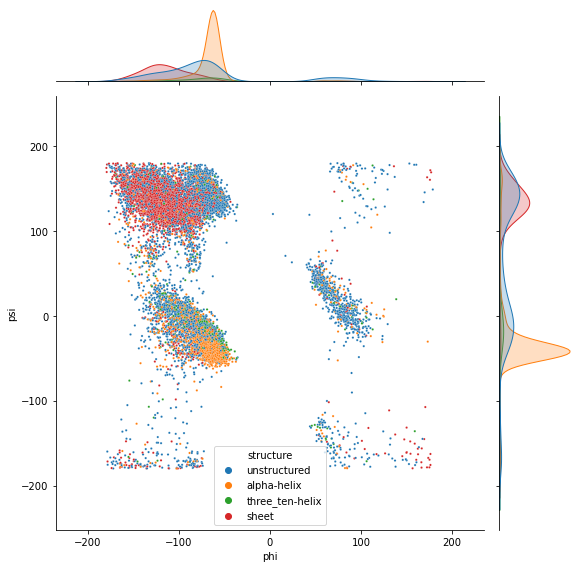

In [38]:
sns.jointplot(x=df['phi'], y=df['psi'], hue=df['structure'], s=5, height=8)

In [43]:
df_alpha = df[df['structure'] == 'alpha-helix']
df_310 = df[df['structure'] == 'three_ten-helix']

df_helix = pd.concat((df_alpha, df_310))

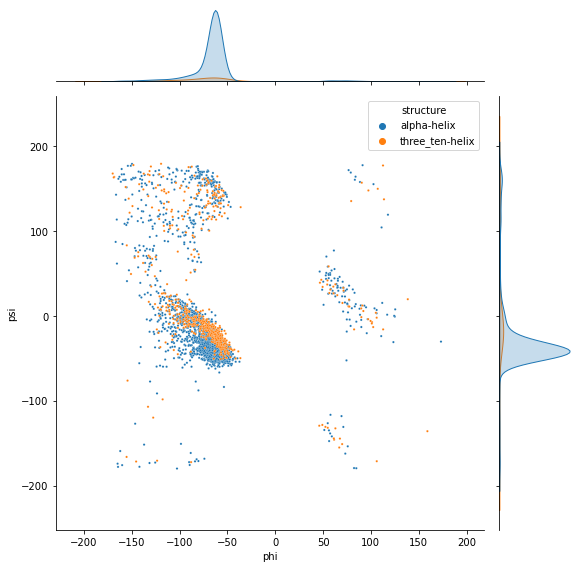

In [46]:
sns.jointplot(x=df_helix['phi'], y=df_helix['psi'], hue=df_helix['structure'], s=5, height=8)